# nibabel ( ナイバボー )

### NfTI ( Neuroimaging informatics Tcdhnology Initiative )
- *NfTI ( ニフティー )　は主に、脳のMRI画像形式に使われている*
- **医療画像の data 形式によく使用される**

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
# import pathlib
from pathlib import Path
# import tqdm　/ 関数だけを呼び出す事によって tqdm を　2回記述しなくて済む
from tqdm import tqdm

In [28]:
import nibabel as nib

## nib.load( )

In [29]:
## COVID DataFrame 作成
p = Path('../public-covid-data/')

df_list = []

for folder in p.iterdir():
    path_list = [p.as_posix() for p in list(folder.iterdir())]
    file_list = [os.path.split(p)[1] for p in list(folder.iterdir())]
    df_list.append(pd.DataFrame({
        'path': path_list,
        'filename': file_list
    }))

# df_list[2] と df_list[3] を merge する
df = df_list[2].merge(df_list[3], on='filename', suffixes=('_im', '_msk'))
df

,path_im,filename,path_msk
0,../public-covid-data/rp_im/1.nii.gz,1.nii.gz,../public-covid-data/rp_msk/1.nii.gz
1,../public-covid-data/rp_im/2.nii.gz,2.nii.gz,../public-covid-data/rp_msk/2.nii.gz
2,../public-covid-data/rp_im/3.nii.gz,3.nii.gz,../public-covid-data/rp_msk/3.nii.gz
3,../public-covid-data/rp_im/4.nii.gz,4.nii.gz,../public-covid-data/rp_msk/4.nii.gz
4,../public-covid-data/rp_im/5.nii.gz,5.nii.gz,../public-covid-data/rp_msk/5.nii.gz
5,../public-covid-data/rp_im/6.nii.gz,6.nii.gz,../public-covid-data/rp_msk/6.nii.gz
6,../public-covid-data/rp_im/7.nii.gz,7.nii.gz,../public-covid-data/rp_msk/7.nii.gz
7,../public-covid-data/rp_im/8.nii.gz,8.nii.gz,../public-covid-data/rp_msk/8.nii.gz
8,../public-covid-data/rp_im/9.nii.gz,9.nii.gz,../public-covid-data/rp_msk/9.nii.gz


In [30]:
path = df['path_im'].iloc[0]
path

'../public-covid-data/rp_im/1.nii.gz'

In [31]:
# 上記の　path を　nid.load( ) に入れる -> get_fdata()関数で 画像の np.array を取得
im_nifti = nib.load(path)
data = im_nifti.get_fdata()
data.shape

(630, 630, 45)

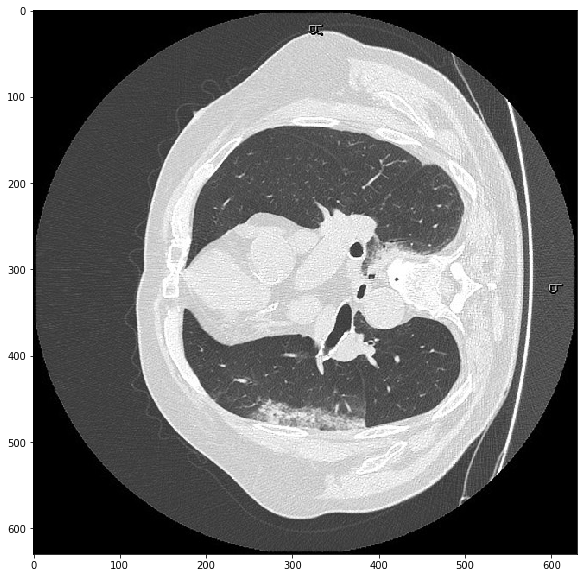

In [32]:
plt.figure(figsize=(10,10))
plt.imshow(data[:, :, 20], cmap='gray')

#### *CT の断面は足側から見た断面*
- **画像の左　:　人体の右側**
- **画像の右　:　人体の左側**


- <u>上記の dataset は画像の左側にCTの台座がきているので 90°回転させて正しい画像になる</u>

In [33]:
# 軸がおかしいので直す　: transpose
data_t = np.transpose(data)
data_t.shape

(45, 630, 630)

### transpose により　( a, b, c )　が　( c, b, a )　になる
- b　:　(height : 高さ)　は変わらない


- *今回は CT の座標で言うと　( width, height, z )　のようになっていたので*
    - **[ :, :, 20 ]　でスライスすると　( w, h ) 横軸・縦軸になり横になってしまった**
        - なので横軸と縦軸を入れ替える
        - 横軸　->　縦軸に
        - 縦軸　->　横軸に


- *Transpose　する事により ( z, h, w )　として　( z, height, width )*
    - **[ 0, :, : ]　のようにスライスして ( h, w )　とすることができた**

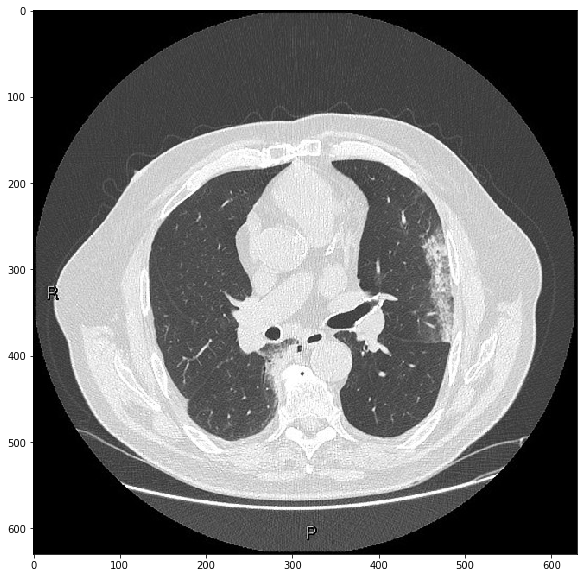

In [35]:
plt.figure(figsize=(10,10))
plt.imshow(data_t[20, :, :], cmap='gray')

## 上記を１つの関数にまとめる

In [36]:
path = df['path_im'].iloc[0]
path

'../public-covid-data/rp_im/1.nii.gz'

In [37]:
def load_nifti(path):
    im_nifti = nib.load(path)
    data = im_nifti.get_fdata()
    data = np.transpose(data)
    
    return data

In [38]:
data = load_nifti(path)

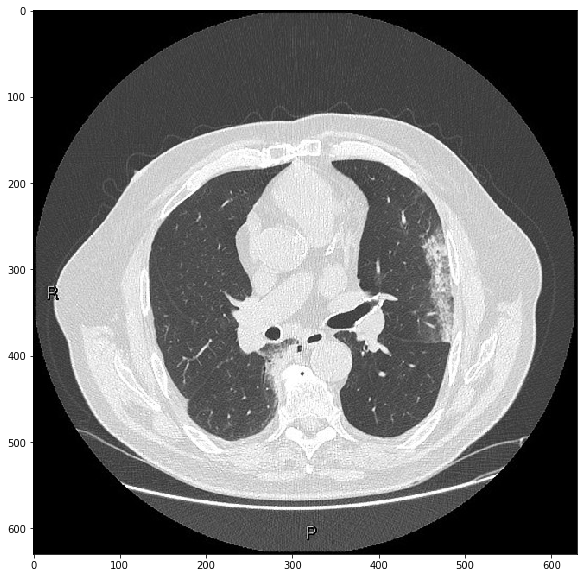

In [39]:
plt.figure(figsize=(10,10))
plt.imshow(data[20], cmap='gray')

## im　と　msk　両方を取得してくる

In [13]:
path_im = df['path_im'].iloc[0]
path_msk = df['path_msk'].iloc[0]

In [14]:
def load_nifti(path):
    im_nifti = nib.load(path)
    data = im_nifti.get_fdata()
    data = np.transpose(data)
    
    return data

In [15]:
data_im = load_nifti(path_im)
data_im.shape

(45, 630, 630)

In [16]:
data_msk = load_nifti(path_msk)
data_msk.shape

(45, 630, 630)

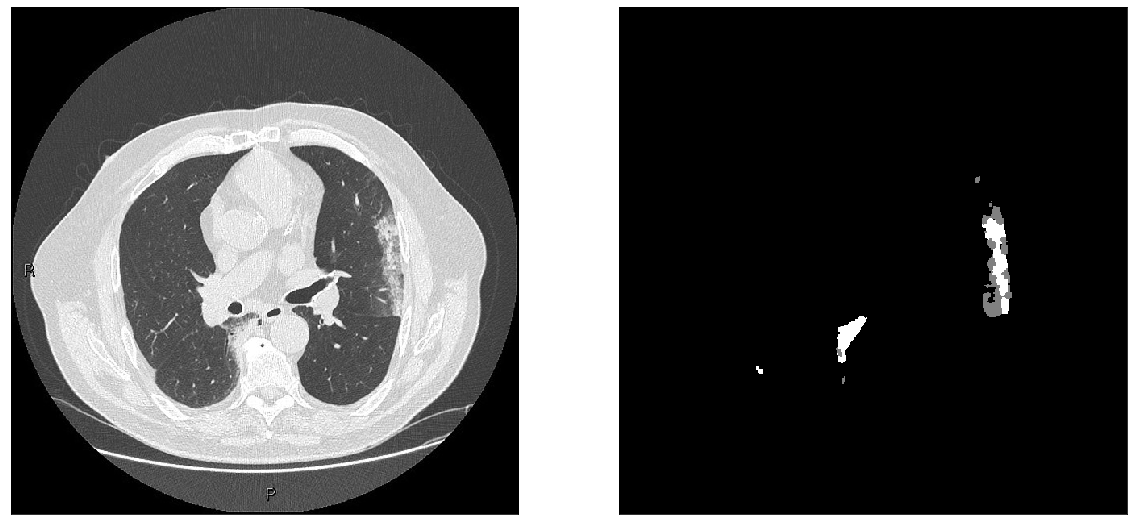

In [17]:
data = [data_im, data_msk]
fig, ax = plt.subplots(1, 2, figsize=(20, 20))
for idx, i in enumerate(data):
    ax[idx].imshow(i[20], cmap='gray')
    ax[idx].set_xticks(ticks=[])  # 横軸のメモリを消す
    ax[idx].set_yticks(ticks=[])  # 縦軸のメモリを消す

In [18]:
np.unique(data_msk[20])

array([0., 1., 2.])

- *0　:　background*


- *1　:　ground-glass　( GGO : すりガラス影 )*


- *2　:　Consolidataion*


- *3　:　pleural effusion　( 胸水 )*

# challenge
- slice_num の columns を新規作成して merge する

In [19]:
df['slice_num'] = np.nan

In [20]:
df

,path_im,filename,path_msk,slice_num
0,../public-covid-data/rp_im/1.nii.gz,1.nii.gz,../public-covid-data/rp_msk/1.nii.gz,NaN
1,../public-covid-data/rp_im/2.nii.gz,2.nii.gz,../public-covid-data/rp_msk/2.nii.gz,NaN
2,../public-covid-data/rp_im/3.nii.gz,3.nii.gz,../public-covid-data/rp_msk/3.nii.gz,NaN
3,../public-covid-data/rp_im/4.nii.gz,4.nii.gz,../public-covid-data/rp_msk/4.nii.gz,NaN
4,../public-covid-data/rp_im/5.nii.gz,5.nii.gz,../public-covid-data/rp_msk/5.nii.gz,NaN
5,../public-covid-data/rp_im/6.nii.gz,6.nii.gz,../public-covid-data/rp_msk/6.nii.gz,NaN
6,../public-covid-data/rp_im/7.nii.gz,7.nii.gz,../public-covid-data/rp_msk/7.nii.gz,NaN
7,../public-covid-data/rp_im/8.nii.gz,8.nii.gz,../public-covid-data/rp_msk/8.nii.gz,NaN
8,../public-covid-data/rp_im/9.nii.gz,9.nii.gz,../public-covid-data/rp_msk/9.nii.gz,NaN


In [21]:
data_im.shape

(45, 630, 630)

In [22]:
# DataFrame を 回す
for idx, row in tqdm(df.iterrows(), total=len(df)):
    data = load_nifti(row['path_im'])
    slice_num = data.shape[0]
    df.loc[idx, 'slice_num'] = slice_num

100%|██████████| 9/9 [00:09<00:00,  1.01s/it]


In [23]:
df

,path_im,filename,path_msk,slice_num
0,../public-covid-data/rp_im/1.nii.gz,1.nii.gz,../public-covid-data/rp_msk/1.nii.gz,45.0
1,../public-covid-data/rp_im/2.nii.gz,2.nii.gz,../public-covid-data/rp_msk/2.nii.gz,39.0
2,../public-covid-data/rp_im/3.nii.gz,3.nii.gz,../public-covid-data/rp_msk/3.nii.gz,418.0
3,../public-covid-data/rp_im/4.nii.gz,4.nii.gz,../public-covid-data/rp_msk/4.nii.gz,39.0
4,../public-covid-data/rp_im/5.nii.gz,5.nii.gz,../public-covid-data/rp_msk/5.nii.gz,66.0
5,../public-covid-data/rp_im/6.nii.gz,6.nii.gz,../public-covid-data/rp_msk/6.nii.gz,42.0
6,../public-covid-data/rp_im/7.nii.gz,7.nii.gz,../public-covid-data/rp_msk/7.nii.gz,42.0
7,../public-covid-data/rp_im/8.nii.gz,8.nii.gz,../public-covid-data/rp_msk/8.nii.gz,45.0
8,../public-covid-data/rp_im/9.nii.gz,9.nii.gz,../public-covid-data/rp_msk/9.nii.gz,93.0


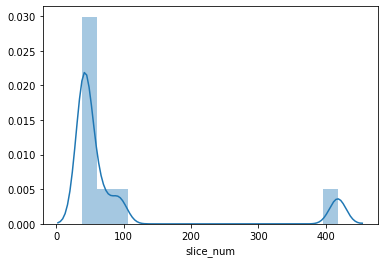

In [24]:
sns.distplot(df['slice_num'])

# multiprocessing
#### 並列処理

In [25]:
from multiprocessing import Pool, cpu_count